#Importing libraries and cleaned_df_Eg dataset

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [ ]:
warnings.filterwarnings("ignore")
df=pd.read_csv('df_final.csv')
pd.set_option('display.max_columns', None)
df.head(2)

,Voc,Jsc,FF,PCE,Cs,MA,FA,Pb,Sn,I,Br,BG,CBO,VBO,arch_nip,arch_pin,h_mobility,e_mobility,CBM,VBM,ETL_CBM,HTL_VBM,Reference
0,1.40,15.24,0.832,17.8,1.0,0.0,0.0,1.0,0.0,2.0,1.0,1.9,-0.3,0.68,1,0,0.000716,0.000992,-4.01,-5.91,-4.31,-5.23,10.1016/j.nantod.2022.101586
1,1.32,15.20,0.792,15.9,1.0,0.0,0.0,1.0,0.0,2.0,1.0,1.9,-0.3,1.08,1,0,0.000191,0.000992,-4.01,-5.91,-4.31,-4.83,10.1016/j.nantod.2022.101586


In [ ]:
print(df.isna().sum().sum())

0


#Heatmap

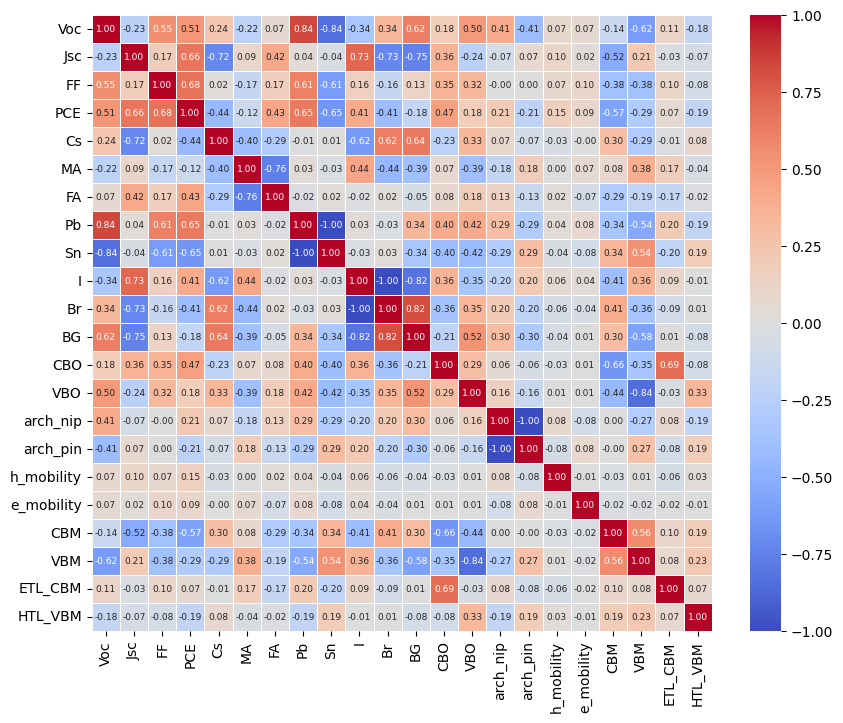

In [ ]:
df1 = df.iloc[:, :-1]
corr_matrix = df1.corr()

# Step 4: Draw the heatmap
plt.figure(figsize=(10, 8))  # optional: adjust figure size for readability
sns.heatmap(
    corr_matrix,
    annot=True,
    cmap='coolwarm',
    fmt=".2f",
    linewidths=0.5,
    annot_kws={"size": 6.5}
)

plt.savefig('Correlation.png', dpi=300, bbox_inches='tight')
plt.show()


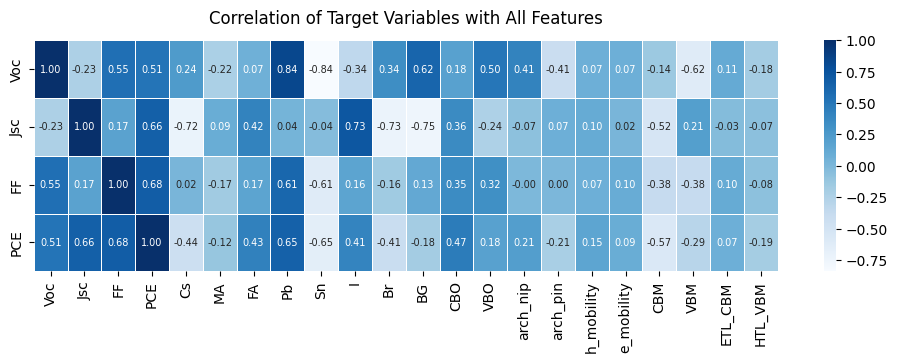

In [ ]:

# Define target columns (0,1,2,3)
target_cols = df1.iloc[:, [0, 1, 2, 3]]

# Compute correlation of target columns with all other features
corr_matrix = df1.corr().loc[target_cols.columns, :]

# Plot heatmap
plt.figure(figsize=(12, 3))  # wide format since we only need 4 rows
sns.heatmap(
    corr_matrix,
    annot=True,
    cmap='Blues',
    fmt=".2f",
    linewidths=0.5,
    annot_kws={"size": 7}
)

plt.title("Correlation of Target Variables with All Features", fontsize=12, pad=12)
plt.savefig('Correlation.png', dpi=300, bbox_inches='tight')
plt.show()


In [ ]:
df1.describe()

,Voc,Jsc,FF,PCE,Cs,MA,FA,Pb,Sn,I,Br,BG,CBO,VBO,arch_nip,arch_pin,h_mobility,e_mobility,CBM,VBM,ETL_CBM,HTL_VBM
count,503.000000,503.000000,503.000000,503.000000,503.000000,503.000000,503.000000,503.000000,503.000000,503.000000,503.000000,503.000000,503.00000,503.000000,503.000000,503.000000,503.000000,503.000000,503.000000,503.000000,503.000000,503.000000
mean,1.052541,21.304819,0.737461,16.560577,0.110883,0.465584,0.423467,0.938429,0.061571,2.638091,0.361909,1.586819,-0.25505,0.298447,0.813121,0.186879,0.000562,0.000474,-3.906322,-5.496421,-4.161372,-5.197974
std,0.155606,3.459837,0.063622,3.763569,0.290970,0.429758,0.411685,0.219834,0.219834,0.555630,0.555630,0.172760,0.23846,0.209858,0.390202,0.390202,0.000910,0.001247,0.173784,0.203410,0.180989,0.115664
min,0.292000,6.640000,0.340200,2.310000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.180000,-1.26000,-0.620000,0.000000,0.000000,0.000004,0.000015,-4.500000,-6.090000,-4.570000,-5.630000
25%,1.038700,20.805000,0.716300,15.145000,0.000000,0.142500,0.000000,1.000000,0.000000,2.550000,0.000000,1.500000,-0.36000,0.180000,1.000000,0.000000,0.000253,0.000029,-4.000000,-5.620000,-4.260000,-5.220000
50%,1.085000,22.300000,0.750000,17.500000,0.000000,0.161500,0.300000,1.000000,0.000000,2.760000,0.240000,1.570000,-0.22000,0.270000,1.000000,0.000000,0.000465,0.000080,-3.900000,-5.460000,-4.200000,-5.220000
75%,1.120000,23.060000,0.773000,18.915000,0.050000,1.000000,0.850000,1.000000,0.000000,3.000000,0.450000,1.600000,-0.08000,0.430000,1.000000,0.000000,0.000465,0.000650,-3.890000,-5.400000,-4.000000,-5.150000
max,1.654000,30.050000,0.832000,24.820000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000,3.000000,2.360000,0.27000,1.080000,1.000000,1.000000,0.007475,0.017300,-3.000000,-4.580000,-3.550000,-4.830000


#Data Prep

In [ ]:
dfx=df.iloc[:,4:-1]
X=dfx.values
y=df.iloc[:,3].values
y=y.reshape(len(y),1)
dfx

,Cs,MA,FA,Pb,Sn,I,Br,BG,CBO,VBO,arch_nip,arch_pin,h_mobility,e_mobility,CBM,VBM,ETL_CBM,HTL_VBM
0,1.0,0.00,0.00,1.0,0.0,2.00,1.00,1.90,-0.30,0.68,1,0,0.000716,0.000992,-4.01,-5.91,-4.31,-5.23
1,1.0,0.00,0.00,1.0,0.0,2.00,1.00,1.90,-0.30,1.08,1,0,0.000191,0.000992,-4.01,-5.91,-4.31,-4.83
2,0.0,0.15,0.85,1.0,0.0,3.00,0.00,1.53,-0.10,0.41,1,0,0.000465,0.000029,-4.10,-5.63,-4.20,-5.22
3,0.0,0.15,0.85,1.0,0.0,2.55,0.45,1.73,-0.18,0.49,1,0,0.000465,0.000029,-3.92,-5.65,-4.10,-5.16
4,1.0,0.00,0.00,1.0,0.0,3.00,0.00,1.69,-0.41,0.15,1,0,0.001200,0.000029,-3.60,-5.29,-4.01,-5.14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
498,0.0,1.00,0.00,1.0,0.0,3.00,0.00,1.50,-0.30,0.30,0,1,0.000330,0.000400,-3.90,-5.40,-4.20,-5.10
499,0.0,1.00,0.00,1.0,0.0,3.00,0.00,1.50,-0.30,0.26,0,1,0.001200,0.000400,-3.90,-5.40,-4.20,-5.14
500,0.0,1.00,0.00,1.0,0.0,3.00,0.00,1.50,-0.30,0.30,0,1,0.000465,0.000400,-3.90,-5.40,-4.20,-5.10
501,0.0,1.00,0.00,1.0,0.0,3.00,0.00,1.50,-0.30,0.10,0,1,0.002300,0.000400,-3.90,-5.40,-4.20,-5.30


#Ensemble Learning

##Random Forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor
X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y, test_size=0.15, random_state=140)
rf=RandomForestRegressor(random_state=100)
rf.fit(X_train1,y_train1)

# Calculate cross-validated RMSE
mse_scores1 = cross_val_score(estimator=rf, X=X_train1, y=y_train1, cv=5, scoring='neg_mean_squared_error')
rmse_scores1 = np.sqrt(-mse_scores1)
print("RMSE: {:.4f}".format(rmse_scores1.mean()))
print("Standard Deviation: {:.4f}".format(rmse_scores1.std()))

RMSE: 1.8305
Standard Deviation: 0.6442


In [ ]:
#RF on Test set
y_pred1=rf.predict(X_test1)
y_pred1=y_pred1.reshape(len(y_pred1),1)
r_value1 = np.corrcoef(y_test1.squeeze(), y_pred1.squeeze())[0, 1]

# Calculate metrics on the test set
print("R2 on Test Set:", r2_score(y_test1, y_pred1))
print("R value:", r_value1)
print("MAE on Test Set:", mean_absolute_error(y_test1, y_pred1))
print("MSE on Test Set:", mean_squared_error(y_test1, y_pred1))
print("RMSE on Test Set:", np.sqrt(mean_squared_error(y_test1, y_pred1)))

R2 on Test Set: 0.9099315711889207
R value: 0.9592071319649081
MAE on Test Set: 0.8803640016708428
MSE on Test Set: 1.4184012845232594
RMSE on Test Set: 1.1909665337545214


In [ ]:
#RF on Train set
y_train_pred1 = rf.predict(X_train1)
y_train_pred1=y_train_pred1.reshape(len(y_train_pred1),1)
r_value_p1 = np.corrcoef(y_train1.squeeze(), y_train_pred1.squeeze())[0, 1]

# Calculate metrics on the test set
print("R2 on Train Set:", r2_score(y_train1, y_train_pred1))
print("R value:", r_value_p1)
print("MAE on Train Set:", mean_absolute_error(y_train1, y_train_pred1))
print("MSE on Train Set:", mean_squared_error(y_train1, y_train_pred1))
print("RMSE on Train Set:", np.sqrt(mean_squared_error(y_train1, y_train_pred1)))

R2 on Train Set: 0.9708620906968044
R value: 0.9872347279610763
MAE on Train Set: 0.451973316605331
MSE on Train Set: 0.4030840141610207
RMSE on Train Set: 0.634888977822911


In [ ]:
np.set_printoptions(precision=2, suppress=True)
print(np.concatenate((y_pred1.reshape(len(y_pred1),1), y_test1.reshape(len(y_test1),1)),1))

[[20.21 18.6 ]
 [19.26 20.4 ]
 [19.22 20.02]
 [19.68 19.2 ]
 [16.1  15.71]
 [16.85 17.67]
 [18.2  17.84]
 [14.76 14.05]
 [19.69 19.63]
 [18.27 18.36]
 [17.68 17.85]
 [14.43 12.7 ]
 [16.9  18.2 ]
 [16.35 17.2 ]
 [ 5.46  4.29]
 [17.96 18.45]
 [18.93 20.35]
 [18.58 18.35]
 [16.19 18.8 ]
 [18.06 18.05]
 [15.54 17.12]
 [19.35 19.01]
 [14.33 12.9 ]
 [18.08 17.5 ]
 [16.78 16.  ]
 [20.   19.68]
 [15.52 15.11]
 [20.72 20.3 ]
 [16.95 19.4 ]
 [18.72 20.3 ]
 [14.16 12.5 ]
 [19.08 18.59]
 [18.56 19.79]
 [19.28 19.6 ]
 [18.52 18.59]
 [18.96 19.03]
 [12.57 14.1 ]
 [17.56 17.33]
 [20.9  21.6 ]
 [19.48 18.82]
 [18.54 19.1 ]
 [16.51 16.91]
 [18.09 17.9 ]
 [16.72 15.77]
 [17.49 17.36]
 [18.95 19.01]
 [10.3   7.04]
 [12.81 11.51]
 [ 7.74  7.11]
 [16.43 18.1 ]
 [ 8.66  8.24]
 [18.07 18.51]
 [19.43 18.77]
 [15.17 13.23]
 [13.71 14.12]
 [15.75 17.  ]
 [11.    6.15]
 [16.81 16.1 ]
 [16.54 18.23]
 [18.72 18.57]
 [19.25 19.29]
 [20.32 21.23]
 [18.49 20.03]
 [18.57 19.27]
 [17.97 18.11]
 [19.89 19.15]
 [19.68 19

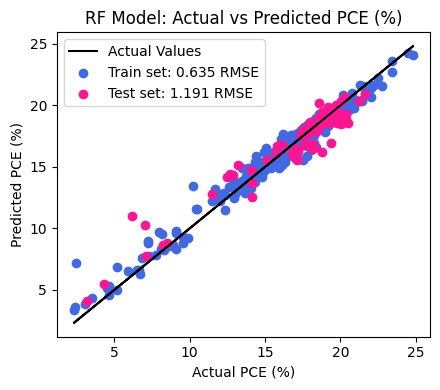

In [ ]:
# Plotting the results for the training set
plt.figure(figsize=(4.5, 4))

plt.plot(y_train1, y_train1, color='black', label='Actual Values')
plt.scatter(y_train1, y_train_pred1, color='royalblue', label='Train set: 0.635 RMSE')
plt.scatter(y_test1, y_pred1, color='deeppink', label='Test set: 1.191 RMSE')

plt.xlabel('Actual PCE (%)')
plt.ylabel('Predicted PCE (%)')
plt.legend()
#plt.grid(True)
plt.title('RF Model: Actual vs Predicted PCE (%)')
plt.savefig('RF_PCE.png', dpi=300, bbox_inches='tight')

plt.tight_layout()
plt.show()

##Gradient Boosting

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y, test_size=0.15,  random_state=140)
gbr=GradientBoostingRegressor(random_state=100)
gbr.fit(X_train2, y_train2)

# Calculate cross-validated RMSE
mse_scores2 = cross_val_score(estimator=gbr, X=X_train2, y=y_train2, cv=5, scoring='neg_mean_squared_error')
rmse_scores2 = np.sqrt(-mse_scores2)
print("RMSE: {:.4f}".format(rmse_scores2.mean()))
print("Standard Deviation: {:.4f}".format(rmse_scores2.std()))

RMSE: 1.8291
Standard Deviation: 0.3798


In [ ]:
#GBR on test set
y_pred2=gbr.predict(X_test2)
y_pred2=y_pred2.reshape(len(y_pred2),1)
r_value2 = np.corrcoef(y_test2.squeeze(), y_pred2.squeeze())[0, 1]

# Calculate metrics on the test set
print("R2 on Test Set:", r2_score(y_test2, y_pred2))
print("R value:", r_value2)
print("MAE on Test Set:", mean_absolute_error(y_test2, y_pred2))
print("MSE on Test Set:", mean_squared_error(y_test2, y_pred2))
print("RMSE on Test Set:", np.sqrt(mean_squared_error(y_test2, y_pred2)))

R2 on Test Set: 0.9147433619064504
R value: 0.9606667853596058
MAE on Test Set: 0.9374206959483309
MSE on Test Set: 1.342625008366416
RMSE on Test Set: 1.1587169664617913


In [ ]:
#GBR on train set
y_train_pred2 = gbr.predict(X_train2)
y_train_pred2=y_train_pred2.reshape(len(y_train_pred2),1)
r_value_p2 = np.corrcoef(y_train2.squeeze(), y_train_pred2.squeeze())[0, 1]

# Calculate metrics on the test set
print("R2 on Test Set:", r2_score(y_train2, y_train_pred2))
print("R value:", r_value_p2)
print("MAE on Test Set:", mean_absolute_error(y_train2, y_train_pred2))
print("MSE on Test Set:", mean_squared_error(y_train2, y_train_pred2))
print("RMSE on Test Set:", np.sqrt(mean_squared_error(y_train2, y_train_pred2)))

R2 on Test Set: 0.9278020805751163
R value: 0.9641678656583789
MAE on Test Set: 0.7756534528123387
MSE on Test Set: 0.9987616775464522
RMSE on Test Set: 0.9993806469741408


In [ ]:
np.set_printoptions(precision=2,suppress=True)
print(np.concatenate((y_pred2.reshape(len(y_pred2),1), y_test2.reshape(len(y_test2),1)),1))

[[19.22 18.6 ]
 [18.67 20.4 ]
 [18.97 20.02]
 [19.24 19.2 ]
 [16.46 15.71]
 [16.76 17.67]
 [18.36 17.84]
 [15.36 14.05]
 [19.18 19.63]
 [17.89 18.36]
 [17.14 17.85]
 [14.79 12.7 ]
 [16.3  18.2 ]
 [16.28 17.2 ]
 [ 5.22  4.29]
 [18.44 18.45]
 [18.63 20.35]
 [17.95 18.35]
 [16.51 18.8 ]
 [18.04 18.05]
 [17.82 17.12]
 [19.19 19.01]
 [14.19 12.9 ]
 [18.01 17.5 ]
 [17.55 16.  ]
 [18.71 19.68]
 [16.04 15.11]
 [20.32 20.3 ]
 [18.04 19.4 ]
 [18.23 20.3 ]
 [14.6  12.5 ]
 [19.54 18.59]
 [18.83 19.79]
 [18.73 19.6 ]
 [18.4  18.59]
 [18.49 19.03]
 [12.14 14.1 ]
 [17.93 17.33]
 [20.41 21.6 ]
 [19.01 18.82]
 [18.8  19.1 ]
 [16.64 16.91]
 [19.85 17.9 ]
 [16.97 15.77]
 [18.42 17.36]
 [18.85 19.01]
 [ 9.88  7.04]
 [13.15 11.51]
 [ 9.48  7.11]
 [16.51 18.1 ]
 [ 9.85  8.24]
 [18.19 18.51]
 [19.2  18.77]
 [15.31 13.23]
 [14.32 14.12]
 [16.62 17.  ]
 [ 7.78  6.15]
 [16.81 16.1 ]
 [16.78 18.23]
 [18.46 18.57]
 [18.27 19.29]
 [20.23 21.23]
 [18.87 20.03]
 [18.84 19.27]
 [17.4  18.11]
 [19.19 19.15]
 [19.31 19

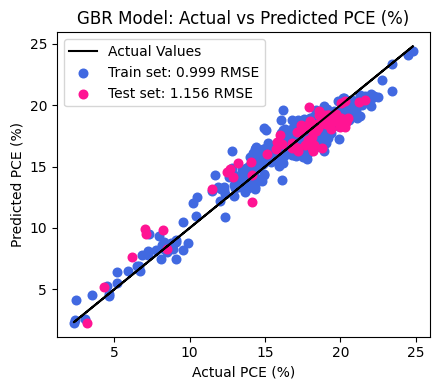

In [ ]:
# Plotting the results for the training set
plt.figure(figsize=(4.5, 4))
plt.plot(y_train2, y_train2, color='black', label='Actual Values')
plt.scatter(y_train2, y_train_pred2, edgecolors='royalblue',
                linewidth=1.2,color='royalblue', label='Train set: 0.999 RMSE')
plt.scatter(y_test2, y_pred2, edgecolors='deeppink',
                linewidth=1.2,color='deeppink', label='Test set: 1.156 RMSE')
plt.xlabel('Actual PCE (%)')
plt.ylabel('Predicted PCE (%)')
plt.legend()
#plt.grid(True)
plt.title('GBR Model: Actual vs Predicted PCE (%)')
plt.savefig('GBR_PCE.png', dpi=300, bbox_inches='tight')


plt.tight_layout()
plt.show()

##XGBoost

In [ ]:
import xgboost as xgb
X_train3, X_test3, y_train3, y_test3 = train_test_split(X, y, test_size=0.15, random_state=140)
xgb = xgb.XGBRegressor(random_state=42)
xgb.fit(X_train3,y_train3)

mse_scores3 = cross_val_score(estimator = xgb, X = X_train3, y = y_train3, cv = 5, scoring='neg_mean_squared_error')
rmse_scores3 = np.sqrt(-mse_scores3)
print("RMSE: {:.4f}".format(rmse_scores3.mean()))
print("Standard Deviation: {:.4f}".format(rmse_scores3.std()))

RMSE: 1.9615
Standard Deviation: 0.5429


In [ ]:
#XGB on Test set
y_pred3=xgb.predict(X_test3)
y_pred3=y_pred3.reshape(len(y_pred3),1)
r_value3 = np.corrcoef(y_test3.squeeze(), y_pred3.squeeze())[0, 1]

# Calculate metrics on the test set
print("R2 on Test Set:", r2_score(y_test3, y_pred3))
print("R value:", r_value3)
print("MAE on Test Set:", mean_absolute_error(y_test3, y_pred3))
print("RMSE on Test Set:", np.sqrt(mean_squared_error(y_test3, y_pred3)))

R2 on Test Set: 0.9132687590191366
R value: 0.9574102972880797
MAE on Test Set: 0.8924375197761938
RMSE on Test Set: 1.1686946199422628


In [ ]:
#XGB on Train set
y_train_pred3 = xgb.predict(X_train3)

y_train_pred3=y_train_pred3.reshape(len(y_train_pred3),1)
r_value_p3 = np.corrcoef(y_train3.squeeze(), y_train_pred3.squeeze())[0, 1]

# Calculate metrics on the test set
print("R2 on Train Set:", r2_score(y_train3, y_train_pred3))
print("R value:", r_value_p3)
print("MAE on Train Set:", mean_absolute_error(y_train3, y_train_pred3))
print("MSE on Train Set:", mean_squared_error(y_train3, y_train_pred3))
print("RMSE on Train Set:", np.sqrt(mean_squared_error(y_train3, y_train_pred3)))

R2 on Train Set: 0.9986132401696879
R value: 0.9993092676816274
MAE on Train Set: 0.05998223284647667
MSE on Train Set: 0.019183967980096486
RMSE on Train Set: 0.13850620195535104


In [ ]:
print(np.concatenate((y_pred3.reshape(len(y_pred3),1), y_test3.reshape(len(y_test3),1)),1))

[[19.85 18.6 ]
 [18.75 20.4 ]
 [19.13 20.02]
 [19.56 19.2 ]
 [15.4  15.71]
 [16.49 17.67]
 [17.9  17.84]
 [15.74 14.05]
 [19.49 19.63]
 [19.46 18.36]
 [17.33 17.85]
 [13.89 12.7 ]
 [17.56 18.2 ]
 [15.95 17.2 ]
 [ 5.06  4.29]
 [17.33 18.45]
 [19.25 20.35]
 [18.85 18.35]
 [15.77 18.8 ]
 [18.02 18.05]
 [16.62 17.12]
 [19.38 19.01]
 [14.14 12.9 ]
 [17.82 17.5 ]
 [17.9  16.  ]
 [19.52 19.68]
 [15.45 15.11]
 [20.89 20.3 ]
 [17.52 19.4 ]
 [19.66 20.3 ]
 [13.57 12.5 ]
 [18.75 18.59]
 [18.75 19.79]
 [19.18 19.6 ]
 [18.58 18.59]
 [18.88 19.03]
 [11.23 14.1 ]
 [18.08 17.33]
 [20.81 21.6 ]
 [19.84 18.82]
 [18.22 19.1 ]
 [15.77 16.91]
 [18.27 17.9 ]
 [17.04 15.77]
 [17.07 17.36]
 [19.33 19.01]
 [ 9.89  7.04]
 [12.07 11.51]
 [ 7.33  7.11]
 [16.35 18.1 ]
 [10.06  8.24]
 [18.34 18.51]
 [19.26 18.77]
 [15.67 13.23]
 [14.71 14.12]
 [15.82 17.  ]
 [ 9.73  6.15]
 [16.82 16.1 ]
 [17.59 18.23]
 [18.85 18.57]
 [19.46 19.29]
 [19.62 21.23]
 [19.39 20.03]
 [19.27 19.27]
 [18.2  18.11]
 [19.65 19.15]
 [20.04 19

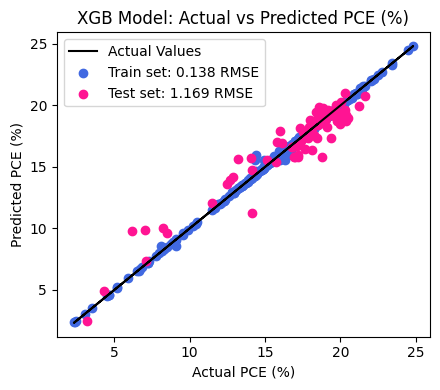

In [ ]:
y_train_pred3 = xgb.predict(X_train3)
# Plotting the results for the training set
plt.figure(figsize=(4.5, 4))

plt.plot(y_train3, y_train3, color='black', label='Actual Values')
plt.scatter(y_train3, y_train_pred3, color='royalblue', label='Train set: 0.138 RMSE')
plt.scatter(y_test3, y_pred3, color='deeppink', label='Test set: 1.169 RMSE')

plt.title('Training Set: Actual vs Predicted')
plt.xlabel('Actual PCE (%)')
plt.ylabel('Predicted PCE (%)')
plt.legend()
#plt.grid(True)
plt.title('XGB Model: Actual vs Predicted PCE (%)')
plt.savefig('XGB_PCE.png', dpi=300, bbox_inches='tight')

plt.tight_layout()
plt.show()

##CatBoost

In [ ]:
!pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 7.4 MB/s eta 0:00:00


In [ ]:
from catboost import CatBoostRegressor
X_train4, X_test4, y_train4, y_test4 = train_test_split(X, y, test_size=0.15, random_state=140)
catboost = CatBoostRegressor(random_state=42)
catboost.fit(X_train4, y_train4, verbose=0)

# Evaluating with cross-validation
mse_scores4 = cross_val_score(estimator = catboost, X = X_train4, y = y_train4, cv = 5, scoring='neg_mean_squared_error')
rmse_scores4 = np.sqrt(-mse_scores4)
print("RMSE: {:.4f}".format(rmse_scores4.mean()))
print("Standard Deviation: {:.4f}".format(rmse_scores4.std()))

Streaming output truncated to the last 5000 lines.
6:	learn: 3.2834876	total: 8.09ms	remaining: 1.15s
7:	learn: 3.2326386	total: 9.2ms	remaining: 1.14s
8:	learn: 3.1889569	total: 10.1ms	remaining: 1.11s
9:	learn: 3.1519219	total: 10.4ms	remaining: 1.03s
10:	learn: 3.1081734	total: 11.5ms	remaining: 1.03s
11:	learn: 3.0556676	total: 12.8ms	remaining: 1.05s
12:	learn: 3.0101590	total: 13.8ms	remaining: 1.05s
13:	learn: 2.9679408	total: 14.7ms	remaining: 1.04s
14:	learn: 2.9246094	total: 15.7ms	remaining: 1.03s
15:	learn: 2.8828472	total: 16.6ms	remaining: 1.02s
16:	learn: 2.8359112	total: 17.5ms	remaining: 1.01s
17:	learn: 2.8073174	total: 18.5ms	remaining: 1.01s
18:	learn: 2.7644077	total: 19.4ms	remaining: 1s
19:	learn: 2.7283844	total: 20.3ms	remaining: 993ms
20:	learn: 2.6981258	total: 21.2ms	remaining: 990ms
21:	learn: 2.6587900	total: 22.5ms	remaining: 1s
22:	learn: 2.6286503	total: 23.5ms	remaining: 999ms
23:	learn: 2.5989830	total: 24.4ms	remaining: 994ms
24:	learn: 2.5662173	tot

In [ ]:
#CB on Test set
y_pred4 = catboost.predict(X_test4)
y_pred4 = y_pred4.reshape(len(y_pred4), 1)
r_value4 = np.corrcoef(y_test4.squeeze(), y_pred4.squeeze())[0, 1]

# Calculate metrics on the test set
print("R2 on Test Set:", r2_score(y_test4, y_pred4))
print("R value:", r_value4)
print("MAE on Test Set:", mean_absolute_error(y_test4, y_pred4))
print("MSE on Test Set:", mean_squared_error(y_test4, y_pred4))
print("RMSE on Test Set:", np.sqrt(mean_squared_error(y_test4, y_pred4)))

R2 on Test Set: 0.9238690765794693
R value: 0.9643153532682711
MAE on Test Set: 0.8718138519938236
MSE on Test Set: 1.1989128820945907
RMSE on Test Set: 1.0949488034125572


In [ ]:
#CB on Train set
y_train_pred4 = catboost.predict(X_train4)

y_train_pred4=y_train_pred4.reshape(len(y_train_pred4),1)
r_value_p4 = np.corrcoef(y_train4.squeeze(), y_train_pred4.squeeze())[0, 1]

# Calculate metrics on the test set
print("R2 on Train Set:", r2_score(y_train4, y_train_pred4))
print("R value:", r_value_p4)
print("MAE on Train Set:", mean_absolute_error(y_train4, y_train_pred4))
print("MSE on Train Set:", mean_squared_error(y_train4, y_train_pred4))
print("RMSE on Train Set:", np.sqrt(mean_squared_error(y_train4, y_train_pred4)))

R2 on Train Set: 0.9821464118958348
R value: 0.9913151834781823
MAE on Train Set: 0.38566099212440264
MSE on Train Set: 0.24698051892882622
RMSE on Train Set: 0.49697134618489447


In [ ]:
np.set_printoptions(precision=2, suppress=True)
print(np.concatenate((y_pred4.reshape(len(y_pred4),1), y_test4.reshape(len(y_test4),1)),1))

[[19.46 18.6 ]
 [18.36 20.4 ]
 [18.78 20.02]
 [19.36 19.2 ]
 [15.94 15.71]
 [16.76 17.67]
 [17.67 17.84]
 [15.43 14.05]
 [19.87 19.63]
 [18.31 18.36]
 [18.02 17.85]
 [14.86 12.7 ]
 [16.62 18.2 ]
 [16.42 17.2 ]
 [ 5.05  4.29]
 [17.9  18.45]
 [18.92 20.35]
 [18.37 18.35]
 [15.75 18.8 ]
 [18.32 18.05]
 [18.02 17.12]
 [19.4  19.01]
 [13.97 12.9 ]
 [17.87 17.5 ]
 [17.75 16.  ]
 [19.   19.68]
 [15.06 15.11]
 [20.23 20.3 ]
 [17.21 19.4 ]
 [18.76 20.3 ]
 [14.   12.5 ]
 [19.2  18.59]
 [19.05 19.79]
 [18.72 19.6 ]
 [18.5  18.59]
 [18.82 19.03]
 [13.44 14.1 ]
 [17.66 17.33]
 [20.41 21.6 ]
 [19.49 18.82]
 [18.07 19.1 ]
 [16.4  16.91]
 [18.98 17.9 ]
 [17.14 15.77]
 [17.56 17.36]
 [19.14 19.01]
 [ 9.62  7.04]
 [12.54 11.51]
 [ 8.04  7.11]
 [16.26 18.1 ]
 [ 9.18  8.24]
 [17.86 18.51]
 [19.04 18.77]
 [15.18 13.23]
 [14.46 14.12]
 [15.85 17.  ]
 [ 8.27  6.15]
 [16.87 16.1 ]
 [17.25 18.23]
 [18.87 18.57]
 [18.93 19.29]
 [20.13 21.23]
 [18.5  20.03]
 [18.78 19.27]
 [17.86 18.11]
 [19.39 19.15]
 [20.38 19

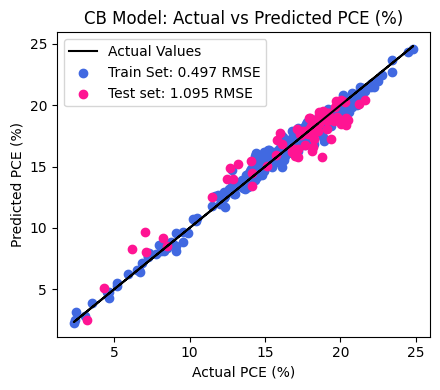

In [ ]:
# Plotting the results for the training set
plt.figure(figsize=(4.5, 4))

plt.plot(y_train4, y_train4, color='black', label='Actual Values')
plt.scatter(y_train4, y_train_pred4, color='royalblue', label='Train Set: 0.497 RMSE')
plt.scatter(y_test4, y_pred4, color='deeppink', label='Test set: 1.095 RMSE')

plt.title('Training Set: Actual vs Predicted')
plt.xlabel('Actual PCE (%)')
plt.ylabel('Predicted PCE (%)')
plt.legend()
#plt.grid(True)
plt.title('CB Model: Actual vs Predicted PCE (%)')
plt.savefig('CB_PCE.png', dpi=300, bbox_inches='tight')

plt.tight_layout()
plt.show()

#SHAP Analysis

In [ ]:
pip install shap

In [ ]:
import shap
shap.initjs()

In [ ]:
dfx.shape

(503, 18)

In [ ]:
col=dfx.columns
dfx_test = pd.DataFrame(data=X, columns=col)

In [ ]:
explainer=shap.Explainer(catboost)
shap_values=explainer(dfx_test[0:])

In [ ]:
np.shape(shap_values.values)

(503, 18)

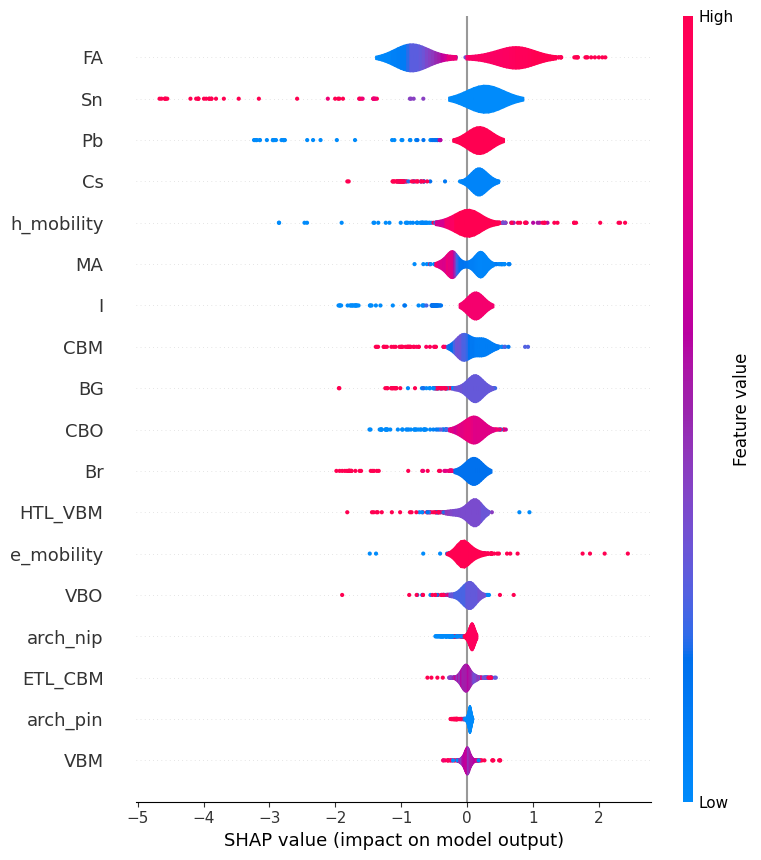

<Figure size 640x480 with 0 Axes>

In [ ]:
#plt.figure(figsize=(10, 3))
shap.summary_plot(shap_values, plot_type='violin')
# Create the summary plot
#shap.summary_plot(shap_values)

plt.savefig("shap_summary.png", dpi=300, bbox_inches="tight")

plt.show()

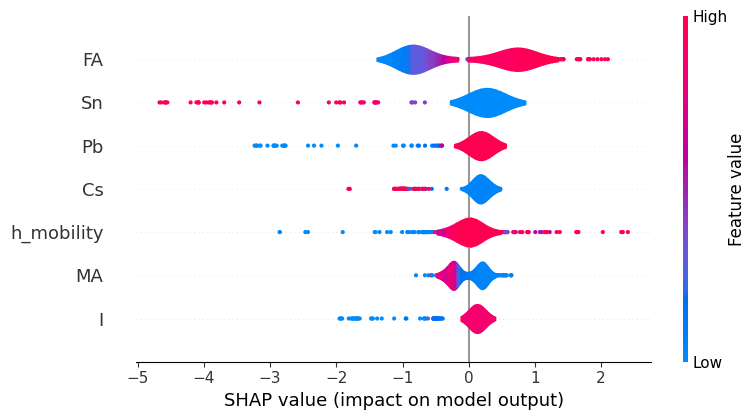

<Figure size 640x480 with 0 Axes>

In [ ]:
plt.figure(figsize=(10, 4))
shap.summary_plot(
    shap_values,
    plot_type="violin",   # beeswarm style
    max_display=7
)

plt.savefig("shap_summary.png", dpi=300, bbox_inches="tight")
plt.show()

In [ ]:
shap.summary_plot(shap_values, plot_type='violin',max_display=7, show=False)

plt.savefig("shap_summary.png", dpi=300, bbox_inches="tight")
plt.close()

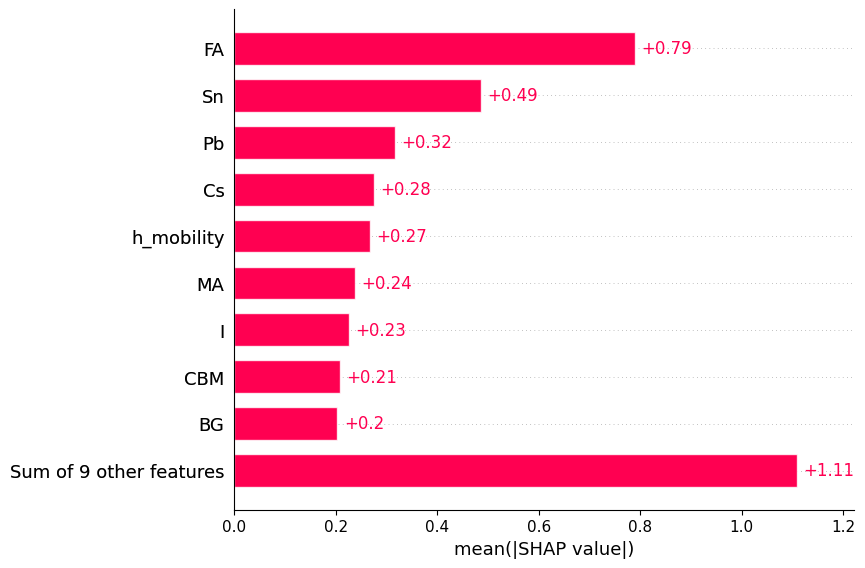

In [ ]:
plt.figure(figsize=(5, 3))
shap.plots.bar(shap_values)
plt.show()

In [ ]:
shap.initjs()
shap.force_plot(shap_values[297])

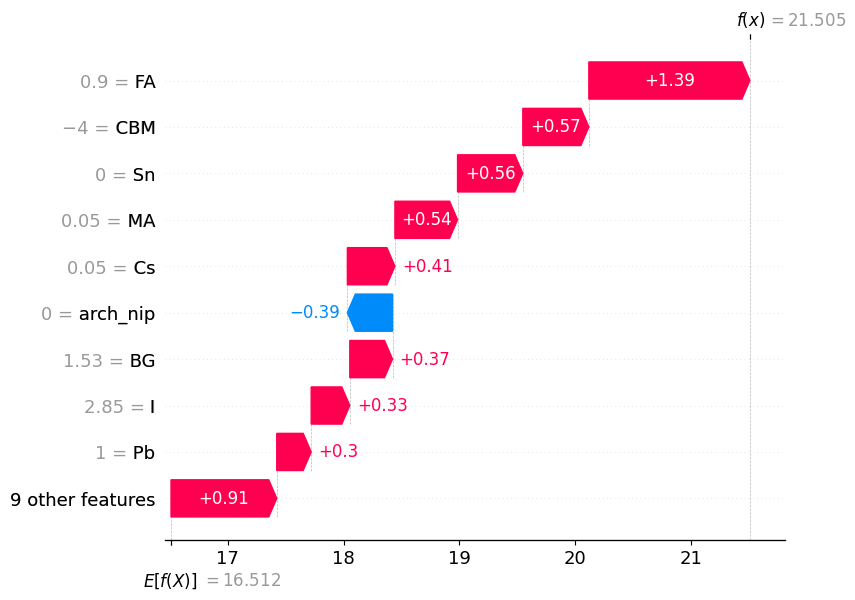

In [ ]:
shap.plots.waterfall(shap_values[297], max_display=10)

In [ ]:
shap.plots.scatter(shap_values[:,'BG'],color=shap_values[:,'Sn'], show=False, hist=False)

# set axis limits according to your requirement
plt.xlim(1.1, 2.6)
#plt.ylim(-1, 1)

plt.savefig("FD_BG.png", dpi=300, bbox_inches="tight")
plt.close()

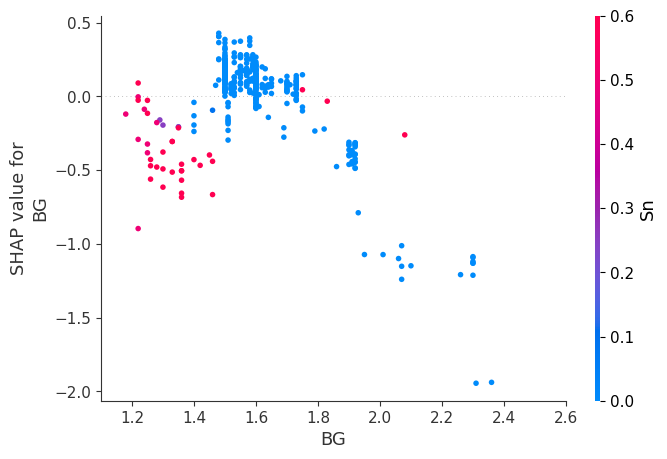

In [ ]:
# Scatter plot without background distribution
shap.plots.scatter(shap_values[:, 'BG'],color=shap_values[:,'Sn'], show=False, hist=False)

# Set axis limits
plt.xlim(1.1, 2.6)
# plt.ylim(-1, 1)

plt.show()

In [ ]:
shap.plots.scatter(shap_values[:,'BG'],color=shap_values[:,'Sn'], show=False, hist=False)

# set axis limits according to your requirement
plt.xlim(1.1, 2.6)
#plt.ylim(-1, 1)

plt.savefig("FD_BG.png", dpi=300, bbox_inches="tight")
plt.close()

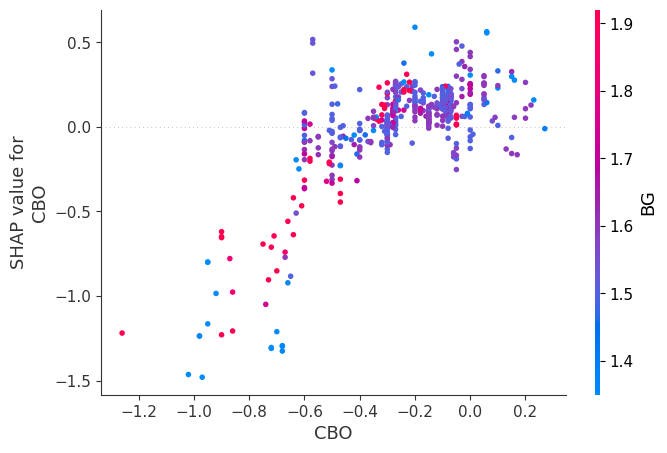

In [ ]:
shap.plots.scatter(shap_values[:,'CBO'],color=shap_values[:,'BG'], show=False, hist=False)
plt.show()

In [ ]:
shap.plots.scatter(shap_values[:,'CBO'],color=shap_values[:,'BG'], show=False, hist=False)

plt.savefig("FD_CBO.png", dpi=300, bbox_inches="tight")
plt.close()

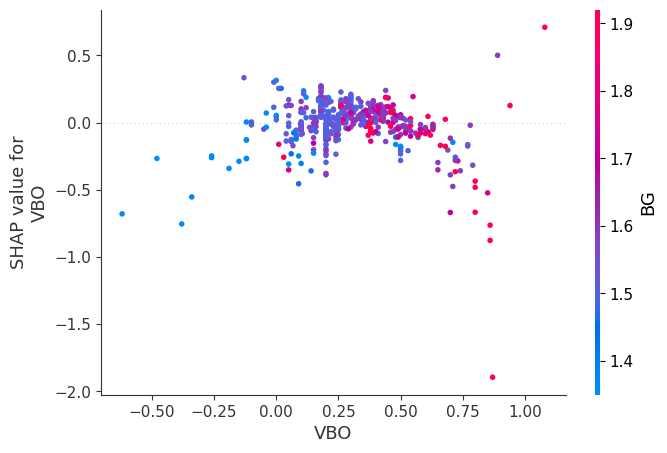

In [ ]:
shap.plots.scatter(shap_values[:,'VBO'],color=shap_values[:,'BG'], hist=False)
plt.show()

In [ ]:
shap.plots.scatter(shap_values[:,'VBO'],color=shap_values[:,'BG'], show=False, hist=False)
plt.savefig("FD_VBO.png", dpi=300, bbox_inches="tight")
plt.close()

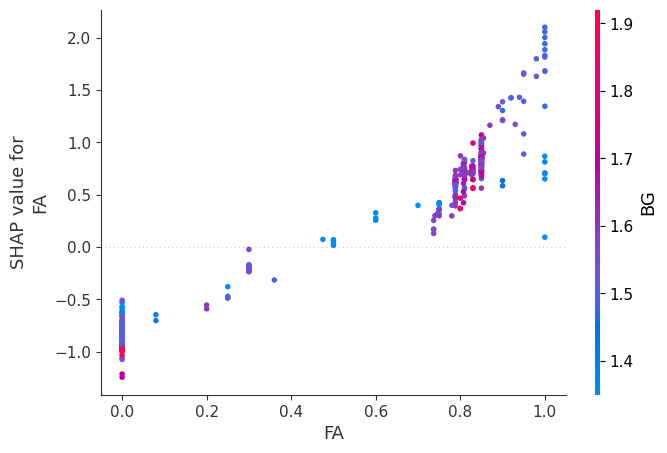

In [ ]:
shap.plots.scatter(shap_values[:,'FA'],color=shap_values[:,'BG'], hist=False)

In [ ]:
shap.plots.scatter(shap_values[:,'FA'],show=False,color=shap_values[:,'BG'], hist=False)
plt.savefig("FD_FA.png", dpi=300, bbox_inches="tight")
plt.close()

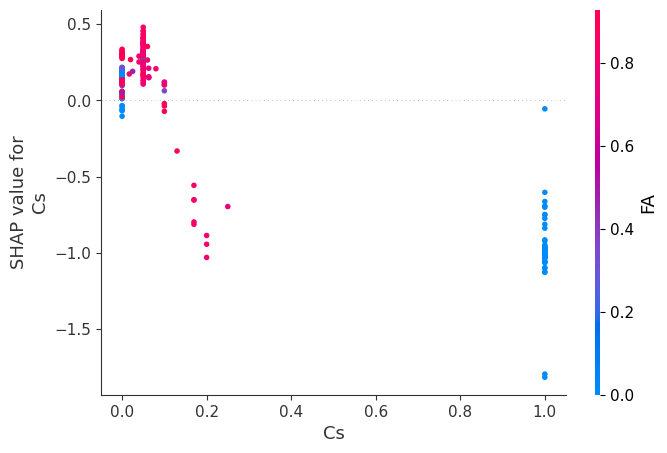

In [ ]:
shap.plots.scatter(shap_values[:,'Cs'], color=shap_values[:,'FA'], hist=False)

In [ ]:
shap.plots.scatter(shap_values[:,'Cs'], color=shap_values[:,'FA'], show=False, hist=False)
plt.savefig("FD_Cs.png", dpi=300, bbox_inches="tight")
plt.close()

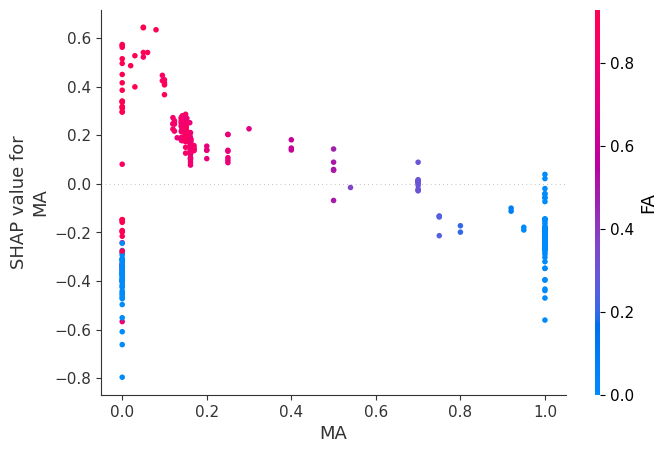

In [ ]:
shap.plots.scatter(shap_values[:,'MA'],color=shap_values[:,'FA'], hist=False)


In [ ]:
shap.plots.scatter(shap_values[:,'MA'], color=shap_values[:,'FA'], show=False, hist=False)
plt.savefig("FD_MA.png", dpi=300, bbox_inches="tight")
plt.close()

<Axes: xlabel='Sn', ylabel='SHAP value for\nSn'>

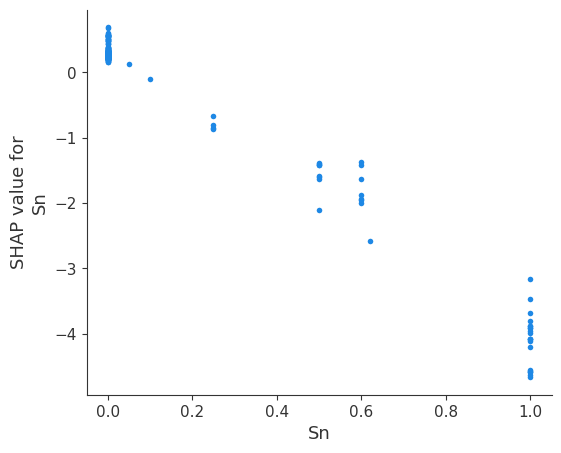

In [ ]:
shap.plots.scatter(shap_values[:,'Sn'], show=False, hist=False)

In [ ]:
shap.plots.scatter(shap_values[:,'Sn'], show=False, hist=False)
plt.savefig("FD_Sn.png", dpi=300, bbox_inches="tight")
plt.close()

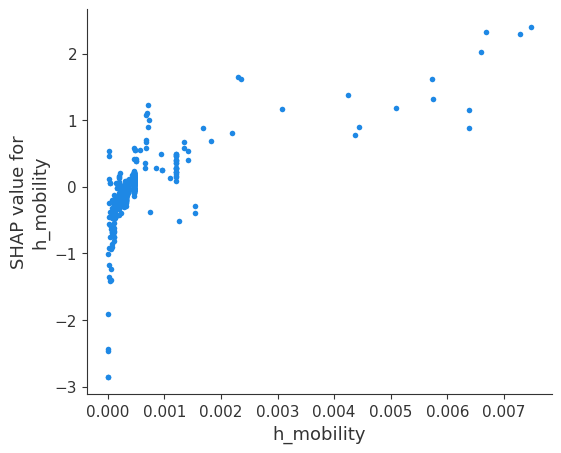

In [ ]:
shap.plots.scatter(shap_values[:,'h_mobility'], hist=False)

In [ ]:
shap.plots.scatter(shap_values[:,'h_mobility'], show=False, hist=False)
plt.savefig("FD_h.png", dpi=300, bbox_inches="tight")
plt.close()

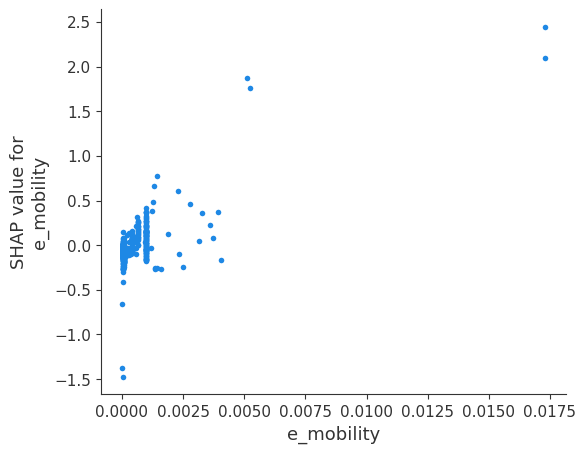

In [ ]:

# your scatter plot
shap.plots.scatter(shap_values[:, 'e_mobility'], show=False, hist=False)

# set axis limits according to your requirement
#plt.xlim(-0.0001, 0.007)   # example: x-axis from -2 to 2
#plt.ylim(-1, 1)   # example: y-axis from -1 to 1

plt.show()


In [ ]:
shap.plots.scatter(shap_values[:,'e_mobility'], show=False, hist=False)
plt.savefig("FD_e.png", dpi=300, bbox_inches="tight")
plt.close()

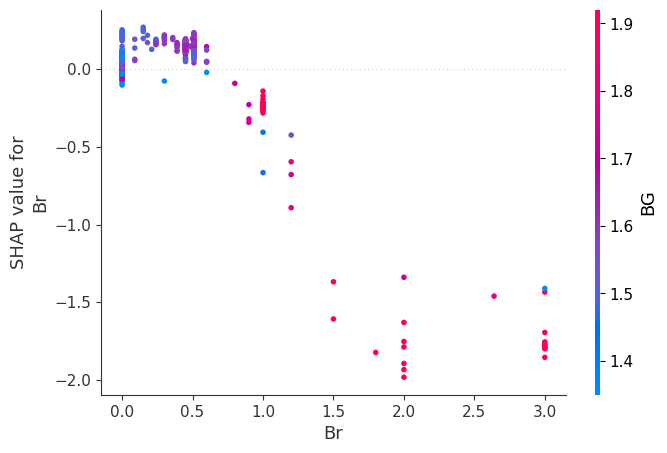

In [ ]:
shap.plots.scatter(shap_values[:,'Br'],color=shap_values[:,'BG'], hist=False)

In [ ]:
shap.plots.scatter(shap_values[:,'Br'],color=shap_values[:,'BG'],show=False, hist=False)
plt.savefig("FD_Br.png", dpi=300, bbox_inches="tight")
plt.close()

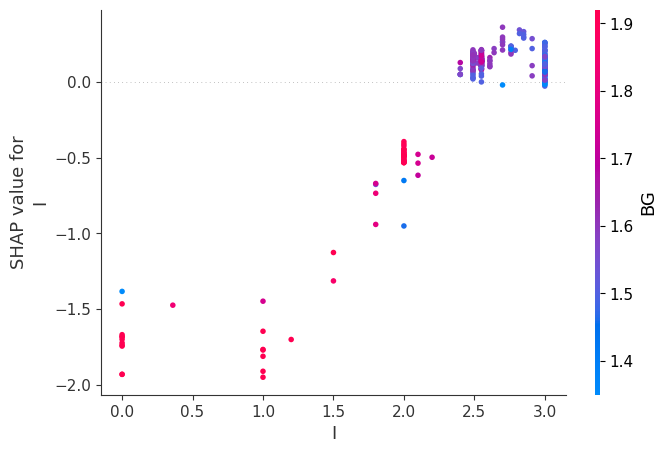

In [ ]:
shap.plots.scatter(shap_values[:,'I'],color=shap_values[:,'BG'], hist=False)


In [ ]:
shap.force_plot(shap_values[298])

# Validate

In [ ]:
features = [
    "Cs", "MA", "FA", "Pb", "Sn", "I", "Br", "BG", "CBO", "VBO",
    "arch_nip", "arch_pin", "h_mobility", "e_mobility",
    "CBM", "VBM", "ETL_CBM", "HTL_VBM"
]

# ---- Manually enter datapoint values here ----
datapoint1 = [0.17, 0, 0.83, 1.0, 0.0, 2.7, 0.3, 1.62, -0.47, 0.5,
              0, 1, 0.0000832, 0.00008, -4.03, -5.65, -4.5, -5.15]

datapoint2 = [0.17, 0, 0.83, 1.0, 0.0, 2.7, 0.3, 1.62, -0.47, 0.5,
              0, 1, 0.0000697, 0.00008, -4.03, -5.65, -4.5, -5.15]
datapoint3 = [0.17,	0,	0.83,	1,	0,	3,	0,	1.58,	-0.1,	0.58,	0,	1,	1.20E-03,	4.00E-04,	-4.1,	-5.68,	-4.2,	-5.1]

datapoint4 = [1,	0,	0,	1,	0,	0,	3,	2.36,	-1.11,	0.25,	1,	0,	3.69E-05,	9.92E-04,	-3.32,	-5.68,	-4.43,	-5.43]
# Convert into DataFrame
X_manual = pd.DataFrame([datapoint1, datapoint2, datapoint3, datapoint4], columns=features)

In [ ]:
# Predict
preds = catboost.predict(X_manual)
preds

array([16.59316399, 17.1129406 , 17.3389048 ,  9.24941244])